In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns

# Surveys & info datasets

In [2]:
#Import and merge survey and info datasets
survey= pd.read_csv("Data/employee_survey_data.csv")
general= pd.read_csv('Data/general_data.csv')
manager= pd.read_csv('Data/manager_survey_data.csv')
general= pd.merge(pd.merge(general,survey,on='EmployeeID',how='inner'),manager,on='EmployeeID')
general.columns= general.columns.str.lower()
general

age attrition     businesstravel              department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      distancefromhome  education educationfield  employeecount  employeeid  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      gender  joblevel                    jobrole maritalstatus  \
0     Female         1  Healthcare Representative       Married   
1     Female         1         Research Scientist        Single   
2       Male         4            Sales Executive       Married   
3       Male         3            Human Resources       Married   
4       Male         1            Sales Executive        Single   
...      ...       ...                        ...           ...   
4405  Female         1         Research Scientist        Single   
4406    Male         1      Laboratory Technician      Divorced   
4407    Male         2            Sales Executive       Married   
4408    Male         1      Laboratory Technician      Divorced   
4409    Male         2      Laboratory Technician      Divorced   

      monthlyincome  numcompaniesworked over18  percentsalaryhike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      standardhours  stockoptionlevel  totalworkingyears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0                5.0   
4408              8           

In [3]:
general.set_index('employeeid',inplace=True)
general

age attrition     businesstravel              department  \
employeeid                                                             
1            51        No      Travel_Rarely                   Sales   
2            31       Yes  Travel_Frequently  Research & Development   
3            32        No  Travel_Frequently  Research & Development   
4            38        No         Non-Travel  Research & Development   
5            32        No      Travel_Rarely  Research & Development   
...         ...       ...                ...                     ...   
4406         42        No      Travel_Rarely  Research & Development   
4407         29        No      Travel_Rarely  Research & Development   
4408         25        No      Travel_Rarely  Research & Development   
4409         42        No      Travel_Rarely                   Sales   
4410         40        No      Travel_Rarely  Research & Development   

            distancefromhome  education educationfield  employeecount  gender  \
employeeid                                                                      
1                          6          2  Life Sciences              1  Female   
2                         10          1  Life Sciences              1  Female   
3                         17          4          Other              1    Male   
4                          2          5  Life Sciences              1    Male   
5                         10          1        Medical              1    Male   
...                      ...        ...            ...            ...     ...   
4406                       5          4        Medical              1  Female   
4407                       2          4        Medical              1    Male   
4408                      25          2  Life Sciences              1    Male   
4409                      18          2        Medical              1    Male   
4410                      28          3        Medical              1    Male   

            joblevel                    jobrole maritalstatus  monthlyincome  \
employeeid                                                                     
1                  1  Healthcare Representative       Married         131160   
2                  1         Research Scientist        Single          41890   
3                  4            Sales Executive       Married         193280   
4                  3            Human Resources       Married          83210   
5                  1            Sales Executive        Single          23420   
...              ...                        ...           ...            ...   
4406               1         Research Scientist        Single          60290   
4407               1      Laboratory Technician      Divorced          26790   
4408               2            Sales Executive       Married          37020   
4409               1      Laboratory Technician      Divorced          23980   
4410               2      Laboratory Technician      Divorced          54680   

            numcompaniesworked over18  percentsalaryhike  standardhours  \
employeeid                                                                
1                          1.0      Y                 11              8   
2                          0.0      Y                 23              8   
3                          1.0      Y                 15              8   
4                          3.0      Y                 11              8   
5                          4.0      Y                 12              8   
...                        ...    ...                ...            ...   
4406                       3.0      Y                 17              8   
4407                       2.0      Y                 15              8   
4408                       0.0      Y                 20              8   
4409                       0.0      Y                 14              8   
4410                       0.0      Y                 12              8   

    

# Time datasets

In [4]:
in_time= pd.read_csv('Data/in_time.csv')
out_time = pd.read_csv('Data/out_time.csv')

In [5]:
total_time= in_time.append(out_time)

In [6]:
# remove columns with only NaN values (office was closed)
total_time = total_time.dropna(axis=1, how='all')
# replace individual days that have NaN with 0 for future calculations
total_time = total_time.fillna(0)
total_time

Unnamed: 0           2015-01-02           2015-01-05  \
0              1  2015-01-02 09:43:45  2015-01-05 10:08:48   
1              2  2015-01-02 10:15:44  2015-01-05 10:21:05   
2              3  2015-01-02 10:17:41  2015-01-05 09:50:50   
3              4  2015-01-02 10:05:06  2015-01-05 09:56:32   
4              5  2015-01-02 10:28:17  2015-01-05 09:49:58   
...          ...                  ...                  ...   
4405        4406  2015-01-02 17:27:37  2015-01-05 19:08:20   
4406        4407  2015-01-02 16:19:01                    0   
4407        4408  2015-01-02 17:17:35  2015-01-05 17:08:07   
4408        4409  2015-01-02 19:48:37  2015-01-05 19:37:40   
4409        4410  2015-01-02 16:49:19  2015-01-05 17:33:02   

               2015-01-06           2015-01-07           2015-01-08  \
0     2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                       0  2015-01-07 09:45:17  2015-01-08 10:09:04   
2     2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3     2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4     2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   
...                   ...                  ...                  ...   
4405  2015-01-06 18:50:49  2015-01-07 18:57:40  2015-01-08 17:58:31   
4406  2015-01-06 15:07:37  2015-01-07 15:25:50  2015-01-08 16:12:33   
4407  2015-01-06 17:27:46  2015-01-07 18:27:22  2015-01-08 17:05:25   
4408  2015-01-06 20:00:08  2015-01-07 19:35:59  2015-01-08 18:55:13   
4409  2015-01-06 16:36:10  2015-01-07 16:33:47  2015-01-08 17:32:31   

               2015-01-09           2015-01-12           2015-01-13  \
0     2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06   
1     2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29   
2     2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26   
3     2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22   
4     2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32   
...                   ...                  ...                  ...   
4405  2015-01-09 18:06:15  2015-01-12 17:58:48  2015-01-13 18:10:35   
4406  2015-01-09 15:26:56  2015-01-12 16:10:42  2015-01-13 16:22:43   
4407  2015-01-09 17:02:57  2015-01-12 17:35:45  2015-01-13 17:15:52   
4408                    0  2015-01-12 19:18:17  2015-01-13 19:24:02   
4409  2015-01-09 17:25:58  2015-01-12 16:39:21  2015-01-13 16:59:28   

               2015-01-15           2015-01-16           2015-01-19  \
0     2015-01-15 10:01:24  2015-01-16 10:19:08                    0   
1     2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2     2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3     2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4     2015-01-15 10:06:12  2015-01-16 10:03:50                    0   
...                   ...                  ...                  ...   
4405  2015-01-15 17:50:37  2015-01-16 18:50:04  2015-01-19 19:18:24   
4406  2015-01-15 16:19:00  2015-01-16 15:30:38  2015-01-19 15:42:04   
4407  2015-01-15 18:15:53  2015-01-16 18:00:37  2015-01-19 17:59:39   
4408  2015-01-15 18:33:21  2015-01-16 19:24:36  2015-01-19 19:15:54   
4409  2015-01-15 17:13:51  2015-01-16 16:46:25  2015-01-19 16:40:30   

               2015-01-20           2015-01-21           2015-01-22  \
0     2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1     2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2     2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3     2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4     2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   
...                   ...                  ...                  ...   
4405  2015-01-20 18:41:28  2015-01-21 18:51:02  2015-01-22 19:18:13   
4406  2015-01-20 16:02:30  2015-01-21 16:05:25                    0   
4407  2015-01-20 17:23:24  2015-01-21 18:09:44  2015-01-22 17:2

In [7]:
# convert data to datetime

In [8]:
# change type of the entire dataframe to datetime
# exclude unamed column with iloc
total_time.iloc[:,1:]= total_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')
total_time

Unnamed: 0          2015-01-02          2015-01-05          2015-01-06  \
0              1 2015-01-02 09:43:45 2015-01-05 10:08:48 2015-01-06 09:54:26   
1              2 2015-01-02 10:15:44 2015-01-05 10:21:05 1970-01-01 00:00:00   
2              3 2015-01-02 10:17:41 2015-01-05 09:50:50 2015-01-06 10:14:13   
3              4 2015-01-02 10:05:06 2015-01-05 09:56:32 2015-01-06 10:11:07   
4              5 2015-01-02 10:28:17 2015-01-05 09:49:58 2015-01-06 09:45:28   
...          ...                 ...                 ...                 ...   
4405        4406 2015-01-02 17:27:37 2015-01-05 19:08:20 2015-01-06 18:50:49   
4406        4407 2015-01-02 16:19:01 1970-01-01 00:00:00 2015-01-06 15:07:37   
4407        4408 2015-01-02 17:17:35 2015-01-05 17:08:07 2015-01-06 17:27:46   
4408        4409 2015-01-02 19:48:37 2015-01-05 19:37:40 2015-01-06 20:00:08   
4409        4410 2015-01-02 16:49:19 2015-01-05 17:33:02 2015-01-06 16:36:10   

              2015-01-07          2015-01-08          2015-01-09  \
0    2015-01-07 09:34:31 2015-01-08 09:51:09 2015-01-09 10:09:25   
1    2015-01-07 09:45:17 2015-01-08 10:09:04 2015-01-09 09:43:26   
2    2015-01-07 09:47:27 2015-01-08 10:03:40 2015-01-09 10:05:49   
3    2015-01-07 09:37:30 2015-01-08 10:02:08 2015-01-09 10:08:12   
4    2015-01-07 09:49:37 2015-01-08 10:19:44 2015-01-09 10:00:50   
...                  ...                 ...                 ...   
4405 2015-01-07 18:57:40 2015-01-08 17:58:31 2015-01-09 18:06:15   
4406 2015-01-07 15:25:50 2015-01-08 16:12:33 2015-01-09 15:26:56   
4407 2015-01-07 18:27:22 2015-01-08 17:05:25 2015-01-09 17:02:57   
4408 2015-01-07 19:35:59 2015-01-08 18:55:13 1970-01-01 00:00:00   
4409 2015-01-07 16:33:47 2015-01-08 17:32:31 2015-01-09 17:25:58   

              2015-01-12          2015-01-13          2015-01-15  \
0    2015-01-12 09:42:53 2015-01-13 10:13:06 2015-01-15 10:01:24   
1    2015-01-12 10:00:07 2015-01-13 10:43:29 2015-01-15 09:37:57   
2    2015-01-12 10:03:47 2015-01-13 10:21:26 2015-01-15 09:55:11   
3    2015-01-12 10:13:42 2015-01-13 09:53:22 2015-01-15 10:00:50   
4    2015-01-12 10:29:27 2015-01-13 09:59:32 2015-01-15 10:06:12   
...                  ...                 ...                 ...   
4405 2015-01-12 17:58:48 2015-01-13 18:10:35 2015-01-15 17:50:37   
4406 2015-01-12 16:10:42 2015-01-13 16:22:43 2015-01-15 16:19:00   
4407 2015-01-12 17:35:45 2015-01-13 17:15:52 2015-01-15 18:15:53   
4408 2015-01-12 19:18:17 2015-01-13 19:24:02 2015-01-15 18:33:21   
4409 2015-01-12 16:39:21 2015-01-13 16:59:28 2015-01-15 17:13:51   

              2015-01-16          2015-01-19          2015-01-20  \
0    2015-01-16 10:19:08 1970-01-01 00:00:00 2015-01-20 09:50:34   
1    2015-01-16 09:57:18 2015-01-19 10:23:43 2015-01-20 09:29:03   
2    2015-01-16 10:05:36 2015-01-19 09:47:53 2015-01-20 09:57:09   
3    2015-01-16 09:58:06 2015-01-19 09:43:11 2015-01-20 10:29:06   
4    2015-01-16 10:03:50 1970-01-01 00:00:00 2015-01-20 10:10:29   
...                  ...                 ...                 ...   
4405 2015-01-16 18:50:04 2015-01-19 19:18:24 2015-01-20 18:41:28   
4406 2015-01-16 15:30:38 2015-01-19 15:42:04 2015-01-20 16:02:30   
4407 2015-01-16 18:00:37 2015-01-19 17:59:39 2015-01-20 17:23:24   
4408 2015-01-16 19:24:36 2015-01-19 19:15:54 2015-01-20 19:42:47   
4409 2015-01-16 16:46:25 2015-01-19 16:40:30 2015-01-20 16:55:42   

              2015-01-21          2015-01-22          2015-01-23  \
0    2015-01-21 09:49:42 2015-01-22 09:47:45 2015-01-23 09:23:44   
1    2015-01-21 09:46:45 2015-01-22 10:03:51 2015-01-23 09:20:06   
2    2015-01-21 10:29:40 2015-01-22 09:59:11 2015-01-23 10:16:34   
3    2015-01-21 10:04:33 2015-01-22 09:51:07 2015-01-23 09:56:56   
4    2015-01-21 10:28:15 2015-01-22 10:10:10 2015-01-23 09:34:34   
...                  ...                 ...                 ...   
4405 2015-01-21 18:51:02 2015-01-22 19:18:13 2015-01-23 17:33:36   
4406 2015-01-21 16:05:25 1970-01-01 00:00:00 2015-

In [9]:
#calculate the difference between the last4410-first 4410 rows
total_time = total_time.diff(periods=4410)

In [10]:
# select only the first half of the dataset
total_time = total_time.iloc[4410:].reset_index(drop=True)

In [11]:
total_time

Unnamed: 0      2015-01-02      2015-01-05      2015-01-06  \
0            0.0 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39   
1            0.0 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00   
2            0.0 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19   
3            0.0 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35   
4            0.0 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57   
...          ...             ...             ...             ...   
4405         0.0 0 days 08:07:05 0 days 08:50:27 0 days 08:23:58   
4406         0.0 0 days 06:15:20 0 days 00:00:00 0 days 05:23:37   
4407         0.0 0 days 07:16:34 0 days 07:35:07 0 days 07:38:29   
4408         0.0 0 days 09:31:32 0 days 09:35:13 0 days 09:47:18   
4409         0.0 0 days 06:50:10 0 days 07:16:48 0 days 06:43:40   

          2015-01-07      2015-01-08      2015-01-09      2015-01-12  \
0    0 days 07:00:24 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46   
1    0 days 07:23:49 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41   
2    0 days 06:45:54 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07   
3    0 days 06:55:10 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55   
4    0 days 07:48:22 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54   
...              ...             ...             ...             ...   
4405 0 days 08:50:42 0 days 08:13:25 0 days 08:16:51 0 days 08:21:38   
4406 0 days 05:43:40 0 days 06:11:36 0 days 05:42:52 0 days 06:03:10   
4407 0 days 07:59:10 0 days 07:17:47 0 days 07:01:54 0 days 07:46:33   
4408 0 days 09:23:28 0 days 09:12:16 0 days 00:00:00 0 days 09:17:39   
4409 0 days 06:50:32 0 days 07:25:36 0 days 06:58:19 0 days 06:51:46   

          2015-01-13      2015-01-15      2015-01-16      2015-01-19  \
0    0 days 07:49:52 0 days 07:20:49 0 days 07:16:03 0 days 00:00:00   
1    0 days 07:16:44 0 days 07:36:47 0 days 07:43:39 0 days 07:34:39   
2    0 days 06:59:59 0 days 07:26:18 0 days 07:12:37 0 days 07:04:20   
3    0 days 07:18:23 0 days 06:52:36 0 days 06:54:28 0 days 06:31:07   
4    0 days 08:15:26 0 days 08:15:36 0 days 08:24:13 0 days 00:00:00   
...              ...             ...             ...             ...   
4405 0 days 08:45:33 0 days 08:21:20 0 days 09:00:27 0 days 09:03:28   
4406 0 days 06:17:32 0 days 06:00:49 0 days 05:35:33 0 days 05:37:17   
4407 0 days 07:28:42 0 days 08:07:22 0 days 07:41:57 0 days 07:50:29   
4408 0 days 09:35:59 0 days 09:29:04 0 days 09:20:21 0 days 09:17:37   
4409 0 days 07:29:28 0 days 07:05:32 0 days 06:51:22 0 days 06:27:35   

          2015-01-20      2015-01-21      2015-01-22      2015-01-23  \
0    0 days 06:46:33 0 days 07:05:42 0 days 07:03:02 0 days 07:36:17   
1    0 days 07:36:10 0 days 07:54:20 0 days 07:22:35 0 days 07:46:44   
2    0 days 06:55:14 0 days 06:48:10 0 days 07:28:43 0 days 06:55:18   
3    0 days 07:10:44 0 days 06:42:18 0 days 07:00:41 0 days 07:08:45   
4    0 days 07:48:55 0 days 08:13:23 0 days 08:17:27 0 days 07:18:37   
...              ...             ...             ...             ...   
4405 0 days 08:36:29 0 days 08:34:43 0 days 08:42:35 0 days 08:00:49   
4406 0 days 06:31:01 0 days 06:05:30 0 days 00:00:00 0 days 05:47:32   
4407 0 days 07:20:29 0 days 08:12:53 0 days 07:11:27 0 days 07:24:36   
4408 0 days 09:47:02 0 days 09:41:42 0 days 09:33:52 0 days 09:18:18   
4409 0 days 06:55:29 0 days 07:00:29 0 days 00:00:00 0 days 00:00:00   

          2015-01-27      2015-01-28      2015-01-29      2015-01-30  \
0    0 days 07:37:45 0 days 07:07:08 0 days 07:24:49 0 days 06:50:59   
1    0 days 07:28:02 0 days 07:11:23 0 days 07:15:34 0 days 07:03:33   
2    0 days 07:14:57 0 days 06:18:21 0 days 07:13:19 0 days 07:01:27   
3    0 days 07:15:17 0 days 07:32:43 0 days 06:54:33 0 days 07:13:11   
4    0 days 07:55:44 0 days 07:55:43 0 days 08:04:45 0 days 08:01:43   
...              ...             ...             ...             ...   
4405 0 days 08:49:14 0 days 08:49:04 0 days 08:09:59 0 days 08:18:25   
4406 0 days 06:44:

In [12]:
# Set index from 1 to match the employee id
total_time.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
total_time.index = range(1,len(total_time)+1)

In [13]:
total_time

2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
1    0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
2    0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
3    0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
4    0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
5    0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   
...              ...             ...             ...             ...   
4406 0 days 08:07:05 0 days 08:50:27 0 days 08:23:58 0 days 08:50:42   
4407 0 days 06:15:20 0 days 00:00:00 0 days 05:23:37 0 days 05:43:40   
4408 0 days 07:16:34 0 days 07:35:07 0 days 07:38:29 0 days 07:59:10   
4409 0 days 09:31:32 0 days 09:35:13 0 days 09:47:18 0 days 09:23:28   
4410 0 days 06:50:10 0 days 07:16:48 0 days 06:43:40 0 days 06:50:32   

          2015-01-08      2015-01-09      2015-01-12      2015-01-13  \
1    0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52   
2    0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44   
3    0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59   
4    0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23   
5    0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26   
...              ...             ...             ...             ...   
4406 0 days 08:13:25 0 days 08:16:51 0 days 08:21:38 0 days 08:45:33   
4407 0 days 06:11:36 0 days 05:42:52 0 days 06:03:10 0 days 06:17:32   
4408 0 days 07:17:47 0 days 07:01:54 0 days 07:46:33 0 days 07:28:42   
4409 0 days 09:12:16 0 days 00:00:00 0 days 09:17:39 0 days 09:35:59   
4410 0 days 07:25:36 0 days 06:58:19 0 days 06:51:46 0 days 07:29:28   

          2015-01-15      2015-01-16      2015-01-19      2015-01-20  \
1    0 days 07:20:49 0 days 07:16:03 0 days 00:00:00 0 days 06:46:33   
2    0 days 07:36:47 0 days 07:43:39 0 days 07:34:39 0 days 07:36:10   
3    0 days 07:26:18 0 days 07:12:37 0 days 07:04:20 0 days 06:55:14   
4    0 days 06:52:36 0 days 06:54:28 0 days 06:31:07 0 days 07:10:44   
5    0 days 08:15:36 0 days 08:24:13 0 days 00:00:00 0 days 07:48:55   
...              ...             ...             ...             ...   
4406 0 days 08:21:20 0 days 09:00:27 0 days 09:03:28 0 days 08:36:29   
4407 0 days 06:00:49 0 days 05:35:33 0 days 05:37:17 0 days 06:31:01   
4408 0 days 08:07:22 0 days 07:41:57 0 days 07:50:29 0 days 07:20:29   
4409 0 days 09:29:04 0 days 09:20:21 0 days 09:17:37 0 days 09:47:02   
4410 0 days 07:05:32 0 days 06:51:22 0 days 06:27:35 0 days 06:55:29   

          2015-01-21      2015-01-22      2015-01-23      2015-01-27  \
1    0 days 07:05:42 0 days 07:03:02 0 days 07:36:17 0 days 07:37:45   
2    0 days 07:54:20 0 days 07:22:35 0 days 07:46:44 0 days 07:28:02   
3    0 days 06:48:10 0 days 07:28:43 0 days 06:55:18 0 days 07:14:57   
4    0 days 06:42:18 0 days 07:00:41 0 days 07:08:45 0 days 07:15:17   
5    0 days 08:13:23 0 days 08:17:27 0 days 07:18:37 0 days 07:55:44   
...              ...             ...             ...             ...   
4406 0 days 08:34:43 0 days 08:42:35 0 days 08:00:49 0 days 08:49:14   
4407 0 days 06:05:30 0 days 00:00:00 0 days 05:47:32 0 days 06:44:55   
4408 0 days 08:12:53 0 days 07:11:27 0 days 07:24:36 0 days 07:22:29   
4409 0 days 09:41:42 0 days 09:33:52 0 days 09:18:18 0 days 09:36:08   
4410 0 days 07:00:29 0 days 00:00:00 0 days 00:00:00 0 days 07:07:46   

          2015-01-28      2015-01-29      2015-01-30      2015-02-02  \
1    0 days 07:07:08 0 days 07:24:49 0 days 06:50:59 0 days 06:54:06   
2    0 days 07:11:23 0 days 07:15:34 0 days 07:03:33 0 days 07:37:52   
3    0 days 06:18:21 0 days 07:13:19 0 days 07:01:27 0 days 07:04:16   
4    0 days 07:32:43 0 days 06:54:33 0 days 07:13:11 0 days 07:04:04   
5    0 days 07:55:43 0 days 08:04:45 0 days 08:01:43 0 days 08:09:54   
...              ...             ...             ...             ...   
4406 0 days 08:49:04 0 days 08:09:59 0 days 08

In [14]:
total_time.dtypes

2015-01-02    timedelta64[ns]
2015-01-05    timedelta64[ns]
2015-01-06    timedelta64[ns]
2015-01-07    timedelta64[ns]
2015-01-08    timedelta64[ns]
                   ...       
2015-12-24    timedelta64[ns]
2015-12-28    timedelta64[ns]
2015-12-29    timedelta64[ns]
2015-12-30    timedelta64[ns]
2015-12-31    timedelta64[ns]
Length: 249, dtype: object

In [15]:
# add a column with the yearly avg time spent at the office per employee
total_time['mean_time'] = total_time.mean(axis=1)

In [16]:
total_time.dtypes

2015-01-02    timedelta64[ns]
2015-01-05    timedelta64[ns]
2015-01-06    timedelta64[ns]
2015-01-07    timedelta64[ns]
2015-01-08    timedelta64[ns]
                   ...       
2015-12-28    timedelta64[ns]
2015-12-29    timedelta64[ns]
2015-12-30    timedelta64[ns]
2015-12-31    timedelta64[ns]
mean_time     timedelta64[ns]
Length: 250, dtype: object

In [17]:
total_time.head()

2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
1 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
2 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
3 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
4 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
5 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13  \
1 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52   
2 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44   
3 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59   
4 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23   
5 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26   

       2015-01-15      2015-01-16      2015-01-19      2015-01-20  \
1 0 days 07:20:49 0 days 07:16:03 0 days 00:00:00 0 days 06:46:33   
2 0 days 07:36:47 0 days 07:43:39 0 days 07:34:39 0 days 07:36:10   
3 0 days 07:26:18 0 days 07:12:37 0 days 07:04:20 0 days 06:55:14   
4 0 days 06:52:36 0 days 06:54:28 0 days 06:31:07 0 days 07:10:44   
5 0 days 08:15:36 0 days 08:24:13 0 days 00:00:00 0 days 07:48:55   

       2015-01-21      2015-01-22      2015-01-23      2015-01-27  \
1 0 days 07:05:42 0 days 07:03:02 0 days 07:36:17 0 days 07:37:45   
2 0 days 07:54:20 0 days 07:22:35 0 days 07:46:44 0 days 07:28:02   
3 0 days 06:48:10 0 days 07:28:43 0 days 06:55:18 0 days 07:14:57   
4 0 days 06:42:18 0 days 07:00:41 0 days 07:08:45 0 days 07:15:17   
5 0 days 08:13:23 0 days 08:17:27 0 days 07:18:37 0 days 07:55:44   

       2015-01-28      2015-01-29      2015-01-30      2015-02-02  \
1 0 days 07:07:08 0 days 07:24:49 0 days 06:50:59 0 days 06:54:06   
2 0 days 07:11:23 0 days 07:15:34 0 days 07:03:33 0 days 07:37:52   
3 0 days 06:18:21 0 days 07:13:19 0 days 07:01:27 0 days 07:04:16   
4 0 days 07:32:43 0 days 06:54:33 0 days 07:13:11 0 days 07:04:04   
5 0 days 07:55:43 0 days 08:04:45 0 days 08:01:43 0 days 08:09:54   

       2015-02-03      2015-02-04      2015-02-05      2015-02-06  \
1 0 days 07:12:11 0 days 07:36:19 0 days 07:33:55 0 days 07:28:12   
2 0 days 07:37:57 0 days 07:38:39 0 days 07:38:14 0 days 07:54:03   
3 0 days 06:31:13 0 days 07:21:51 0 days 06:21:30 0 days 06:54:24   
4 0 days 07:26:10 0 days 06:58:38 0 days 07:09:05 0 days 07:08:43   
5 0 days 08:01:44 0 days 07:59:48 0 days 08:05:26 0 days 07:42:31   

       2015-02-09      2015-02-10      2015-02-11      2015-02-12  \
1 0 days 07:36:05 0 days 07:16:02 0 days 07:11:35 0 days 07:26:07   
2 0 days 00:00:00 0 days 08:02:04 0 days 07:38:16 0 days 07:57:52   
3 0 days 06:39:35 0 days 06:49:31 0 days 06:47:09 0 days 06:27:21   
4 0 days 07:20:02 0 days 00:00:00 0 days 07:03:39 0 days 07:20:28   
5 0 days 08:11:12 0 days 07:40:44 0 days 07:57:49 0 days 07:40:15   

       2015-02-13      2015-02-16      2015-02-17      2015-02-18  \
1 0 days 07:12:19 0 days 07:36:21 0 days 07:24:58 0 days 07:50:23   
2 0 days 07:44:00 0 days 07:41:57 0 days 07:24:25 0 days 07:54:14   
3 0 days 07:08:41 0 days 07:01:22 0 days 06:41:07 0 days 07:02:49   
4 0 days 07:08:44 0 days 07:21:01 0 days 07:06:38 0 days 06:52:21   
5 0 days 08:43:14 0 days 07:55:20 0 days 07:54:09 0 days 08:05:39   

       2015-02-19      2015-02-20      2015-02-23      2015-02-24  \
1 0 days 00:00:00 0 days 07:49:56 0 days 07:26:28 0 days 07:13:30   
2 0 days 07:54:46 0 days 07:25:27 0 days 08:15:20 0 days 07:48:00   
3 0 days 06:57:37 0 days 06:53:11 0 days 07:45:17 0 days 06:45:06   
4 0 days 07:31:25 0 days 06:41:52 0 days 07:10:47 0 days 07:03:51   
5 0 days 07:50:46 0 days 08:13:51 0 days 07:48:10 0 days 08:07:08   

       2015-02-25      2015-02-26      2015-02-27      2015-03-02  \
1 0 days 07:35:01 0 days 07:12:03 0 days 07:23:09 0 days 07:09:25   
2 0 days 07:45:08 0 days 07:50:48 0 days 08:07:13 0 days 07:40:54   
3 0 days 06:56:25 0 days 07:33:11 0 days 06:51:18 0 days 07:29:35

In [18]:
total_time['mean_time']=total_time['mean_time'] / np.timedelta64(1, "h")


In [19]:
total_time.head()

2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
1 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
2 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
3 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
4 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
5 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13  \
1 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52   
2 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44   
3 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59   
4 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23   
5 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26   

       2015-01-15      2015-01-16      2015-01-19      2015-01-20  \
1 0 days 07:20:49 0 days 07:16:03 0 days 00:00:00 0 days 06:46:33   
2 0 days 07:36:47 0 days 07:43:39 0 days 07:34:39 0 days 07:36:10   
3 0 days 07:26:18 0 days 07:12:37 0 days 07:04:20 0 days 06:55:14   
4 0 days 06:52:36 0 days 06:54:28 0 days 06:31:07 0 days 07:10:44   
5 0 days 08:15:36 0 days 08:24:13 0 days 00:00:00 0 days 07:48:55   

       2015-01-21      2015-01-22      2015-01-23      2015-01-27  \
1 0 days 07:05:42 0 days 07:03:02 0 days 07:36:17 0 days 07:37:45   
2 0 days 07:54:20 0 days 07:22:35 0 days 07:46:44 0 days 07:28:02   
3 0 days 06:48:10 0 days 07:28:43 0 days 06:55:18 0 days 07:14:57   
4 0 days 06:42:18 0 days 07:00:41 0 days 07:08:45 0 days 07:15:17   
5 0 days 08:13:23 0 days 08:17:27 0 days 07:18:37 0 days 07:55:44   

       2015-01-28      2015-01-29      2015-01-30      2015-02-02  \
1 0 days 07:07:08 0 days 07:24:49 0 days 06:50:59 0 days 06:54:06   
2 0 days 07:11:23 0 days 07:15:34 0 days 07:03:33 0 days 07:37:52   
3 0 days 06:18:21 0 days 07:13:19 0 days 07:01:27 0 days 07:04:16   
4 0 days 07:32:43 0 days 06:54:33 0 days 07:13:11 0 days 07:04:04   
5 0 days 07:55:43 0 days 08:04:45 0 days 08:01:43 0 days 08:09:54   

       2015-02-03      2015-02-04      2015-02-05      2015-02-06  \
1 0 days 07:12:11 0 days 07:36:19 0 days 07:33:55 0 days 07:28:12   
2 0 days 07:37:57 0 days 07:38:39 0 days 07:38:14 0 days 07:54:03   
3 0 days 06:31:13 0 days 07:21:51 0 days 06:21:30 0 days 06:54:24   
4 0 days 07:26:10 0 days 06:58:38 0 days 07:09:05 0 days 07:08:43   
5 0 days 08:01:44 0 days 07:59:48 0 days 08:05:26 0 days 07:42:31   

       2015-02-09      2015-02-10      2015-02-11      2015-02-12  \
1 0 days 07:36:05 0 days 07:16:02 0 days 07:11:35 0 days 07:26:07   
2 0 days 00:00:00 0 days 08:02:04 0 days 07:38:16 0 days 07:57:52   
3 0 days 06:39:35 0 days 06:49:31 0 days 06:47:09 0 days 06:27:21   
4 0 days 07:20:02 0 days 00:00:00 0 days 07:03:39 0 days 07:20:28   
5 0 days 08:11:12 0 days 07:40:44 0 days 07:57:49 0 days 07:40:15   

       2015-02-13      2015-02-16      2015-02-17      2015-02-18  \
1 0 days 07:12:19 0 days 07:36:21 0 days 07:24:58 0 days 07:50:23   
2 0 days 07:44:00 0 days 07:41:57 0 days 07:24:25 0 days 07:54:14   
3 0 days 07:08:41 0 days 07:01:22 0 days 06:41:07 0 days 07:02:49   
4 0 days 07:08:44 0 days 07:21:01 0 days 07:06:38 0 days 06:52:21   
5 0 days 08:43:14 0 days 07:55:20 0 days 07:54:09 0 days 08:05:39   

       2015-02-19      2015-02-20      2015-02-23      2015-02-24  \
1 0 days 00:00:00 0 days 07:49:56 0 days 07:26:28 0 days 07:13:30   
2 0 days 07:54:46 0 days 07:25:27 0 days 08:15:20 0 days 07:48:00   
3 0 days 06:57:37 0 days 06:53:11 0 days 07:45:17 0 days 06:45:06   
4 0 days 07:31:25 0 days 06:41:52 0 days 07:10:47 0 days 07:03:51   
5 0 days 07:50:46 0 days 08:13:51 0 days 07:48:10 0 days 08:07:08   

       2015-02-25      2015-02-26      2015-02-27      2015-03-02  \
1 0 days 07:35:01 0 days 07:12:03 0 days 07:23:09 0 days 07:09:25   
2 0 days 07:45:08 0 days 07:50:48 0 days 08:07:13 0 days 07:40:54   
3 0 days 06:56:25 0 days 07:33:11 0 days 06:51:18 0 days 07:29:35

In [20]:
# Rename index as employee ID to add the general data set
total_time = total_time.rename(columns = {'index' : 'employeeid'})

In [21]:
##Friday
# Clean data
# Bin per age
# Plot the evolution across year per group

# Cleaning data

In [22]:
#
general['numcompaniesworked'] = general['numcompaniesworked'].fillna(value = 0)

In [23]:
# Replace with corresponding mode of each column
columns_with_null= ['totalworkingyears','environmentsatisfaction','jobsatisfaction','worklifebalance']
general[columns_with_null]= general[columns_with_null].fillna(general.mode().iloc[0])

In [24]:
general.head()


age attrition     businesstravel              department  \
employeeid                                                             
1            51        No      Travel_Rarely                   Sales   
2            31       Yes  Travel_Frequently  Research & Development   
3            32        No  Travel_Frequently  Research & Development   
4            38        No         Non-Travel  Research & Development   
5            32        No      Travel_Rarely  Research & Development   

            distancefromhome  education educationfield  employeecount  gender  \
employeeid                                                                      
1                          6          2  Life Sciences              1  Female   
2                         10          1  Life Sciences              1  Female   
3                         17          4          Other              1    Male   
4                          2          5  Life Sciences              1    Male   
5                         10          1        Medical              1    Male   

            joblevel                    jobrole maritalstatus  monthlyincome  \
employeeid                                                                     
1                  1  Healthcare Representative       Married         131160   
2                  1         Research Scientist        Single          41890   
3                  4            Sales Executive       Married         193280   
4                  3            Human Resources       Married          83210   
5                  1            Sales Executive        Single          23420   

            numcompaniesworked over18  percentsalaryhike  standardhours  \
employeeid                                                                
1                          1.0      Y                 11              8   
2                          0.0      Y                 23              8   
3                          1.0      Y                 15              8   
4                          3.0      Y                 11              8   
5                          4.0      Y                 12              8   

            stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
employeeid                                                               
1                          0                1.0                      6   
2                          1                6.0                      3   
3                          3                5.0                      2   
4                          3               13.0                      5   
5                          2                9.0                      2   

            yearsatcompany  yearssincelastpromotion  yearswithcurrmanager  \
employeeid                                                                  
1                        1                        0                     0   
2                        5                        1                     4   
3                        5                        0                     3   
4                        8                        7                     5   
5                        6                        0                     4   

            environmentsatisfaction  jobsatisfaction  worklifebalance  \
employeeid                                                              
1                               3.0              4.0              2.0   
2                               3.0              2.0              4.0   
3                               2.0              2.0              1.0   
4                               4.0              4.0              3.0   
5                               4.0              1.0              3.0   

            jobinvolvement  performancerating  
employeeid                                     
1                        3                  3  
2                        2                  4  
3                        3                  3  
4                        2               

In [25]:
# Drop uninformative cols: 

In [26]:
general = general.drop(['over18','employeecount', 'standardhours' ], axis = 1)

In [27]:
general.head()

age attrition     businesstravel              department  \
employeeid                                                             
1            51        No      Travel_Rarely                   Sales   
2            31       Yes  Travel_Frequently  Research & Development   
3            32        No  Travel_Frequently  Research & Development   
4            38        No         Non-Travel  Research & Development   
5            32        No      Travel_Rarely  Research & Development   

            distancefromhome  education educationfield  gender  joblevel  \
employeeid                                                                 
1                          6          2  Life Sciences  Female         1   
2                         10          1  Life Sciences  Female         1   
3                         17          4          Other    Male         4   
4                          2          5  Life Sciences    Male         3   
5                         10          1        Medical    Male         1   

                              jobrole maritalstatus  monthlyincome  \
employeeid                                                           
1           Healthcare Representative       Married         131160   
2                  Research Scientist        Single          41890   
3                     Sales Executive       Married         193280   
4                     Human Resources       Married          83210   
5                     Sales Executive        Single          23420   

            numcompaniesworked  percentsalaryhike  stockoptionlevel  \
employeeid                                                            
1                          1.0                 11                 0   
2                          0.0                 23                 1   
3                          1.0                 15                 3   
4                          3.0                 11                 3   
5                          4.0                 12                 2   

            totalworkingyears  trainingtimeslastyear  yearsatcompany  \
employeeid                                                             
1                         1.0                      6               1   
2                         6.0                      3               5   
3                         5.0                      2               5   
4                        13.0                      5               8   
5                         9.0                      2               6   

            yearssincelastpromotion  yearswithcurrmanager  \
employeeid                                                  
1                                 0                     0   
2                                 1                     4   
3                                 0                     3   
4                                 7                     5   
5                                 0                     4   

            environmentsatisfaction  jobsatisfaction  worklifebalance  \
employeeid                                                              
1                               3.0              4.0              2.0   
2                               3.0              2.0              4.0   
3                               2.0              2.0              1.0   
4                               4.0              4.0              3.0   
5                               4.0              1.0              3.0   

            jobinvolvement  performancerating  
employeeid                                     
1                        3                  3  
2                        2                  4  
3                        3                  3  
4                        2                  3  
5                        3                  3

In [28]:
# add mean time column from total_time
general= general.join(total_time['mean_time'], on= 'employeeid', how='inner')

In [29]:
general.to_csv('Data/general_viz_data.csv')

# Data transformation

In [30]:
# Age
general['age'].unique()

array([51, 31, 32, 38, 46, 28, 29, 25, 45, 36, 55, 47, 37, 21, 35, 26, 50,
       53, 42, 44, 49, 18, 41, 39, 58, 33, 43, 52, 27, 30, 54, 40, 23, 48,
       57, 34, 24, 22, 56, 60, 19, 20, 59])

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

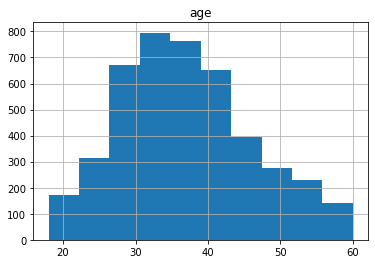

In [31]:
general.hist(column='age')

In [32]:
#Binging age
general['age_bin']= pd.cut(general.age, bins=4, labels=['18-30','31-40','41-50','51-60'])

In [33]:
general.head()

age attrition     businesstravel              department  \
employeeid                                                             
1            51        No      Travel_Rarely                   Sales   
2            31       Yes  Travel_Frequently  Research & Development   
3            32        No  Travel_Frequently  Research & Development   
4            38        No         Non-Travel  Research & Development   
5            32        No      Travel_Rarely  Research & Development   

            distancefromhome  education educationfield  gender  joblevel  \
employeeid                                                                 
1                          6          2  Life Sciences  Female         1   
2                         10          1  Life Sciences  Female         1   
3                         17          4          Other    Male         4   
4                          2          5  Life Sciences    Male         3   
5                         10          1        Medical    Male         1   

                              jobrole maritalstatus  monthlyincome  \
employeeid                                                           
1           Healthcare Representative       Married         131160   
2                  Research Scientist        Single          41890   
3                     Sales Executive       Married         193280   
4                     Human Resources       Married          83210   
5                     Sales Executive        Single          23420   

            numcompaniesworked  percentsalaryhike  stockoptionlevel  \
employeeid                                                            
1                          1.0                 11                 0   
2                          0.0                 23                 1   
3                          1.0                 15                 3   
4                          3.0                 11                 3   
5                          4.0                 12                 2   

            totalworkingyears  trainingtimeslastyear  yearsatcompany  \
employeeid                                                             
1                         1.0                      6               1   
2                         6.0                      3               5   
3                         5.0                      2               5   
4                        13.0                      5               8   
5                         9.0                      2               6   

            yearssincelastpromotion  yearswithcurrmanager  \
employeeid                                                  
1                                 0                     0   
2                                 1                     4   
3                                 0                     3   
4                                 7                     5   
5                                 0                     4   

            environmentsatisfaction  jobsatisfaction  worklifebalance  \
employeeid                                                              
1                               3.0              4.0              2.0   
2                               3.0              2.0              4.0   
3                               2.0              2.0              1.0   
4                               4.0              4.0              3.0   
5                               4.0              1.0              3.0   

            jobinvolvement  performancerating  mean_time age_bin  
employeeid                                                        
1                        3                  3   6.870229   51-60  
2                        2                  4   7.315971   31-40  
3                        3                  3   6.816081   31-40  
4                        2                  3   6.789215   31-40  
5                        3                  3   7.877561   31-40

In [34]:
total_time.drop(columns='mean_time',inplace=True)

In [35]:
total_time =total_time.T
total_time.index= pd.to_datetime(total_time.index)
total_time

1               2               3               4     \
2015-01-02 0 days 07:12:30 0 days 08:06:33 0 days 06:41:33 0 days 07:20:18   
2015-01-05 0 days 07:11:23 0 days 07:27:17 0 days 07:15:56 0 days 07:17:31   
2015-01-06 0 days 07:24:39 0 days 00:00:00 0 days 06:24:19 0 days 06:56:35   
2015-01-07 0 days 07:00:24 0 days 07:23:49 0 days 06:45:54 0 days 06:55:10   
2015-01-08 0 days 07:17:23 0 days 07:25:00 0 days 07:20:42 0 days 06:51:03   
...                    ...             ...             ...             ...   
2015-12-24 0 days 07:35:47 0 days 00:00:00 0 days 06:50:59 0 days 07:05:06   
2015-12-28 0 days 07:46:26 0 days 07:36:53 0 days 07:01:26 0 days 07:26:50   
2015-12-29 0 days 07:18:54 0 days 07:58:57 0 days 07:26:20 0 days 07:25:00   
2015-12-30 0 days 07:46:44 0 days 07:59:10 0 days 07:32:20 0 days 07:21:59   
2015-12-31 0 days 07:04:49 0 days 08:13:38 0 days 06:47:11 0 days 07:07:59   

                      5               6               7               8     \
2015-01-02 0 days 08:03:20 0 days 10:46:46 0 days 06:50:18 0 days 07:05:25   
2015-01-05 0 days 07:59:17 0 days 10:43:19 0 days 07:32:18 0 days 07:03:13   
2015-01-06 0 days 07:40:57 0 days 10:57:49 0 days 07:16:00 0 days 06:39:09   
2015-01-07 0 days 07:48:22 0 days 10:17:55 0 days 06:25:19 0 days 06:49:34   
2015-01-08 0 days 07:39:44 0 days 11:00:34 0 days 07:02:23 0 days 06:19:43   
...                    ...             ...             ...             ...   
2015-12-24 0 days 08:14:58 0 days 10:28:04 0 days 06:54:50 0 days 06:37:01   
2015-12-28 0 days 07:39:44 0 days 00:00:00 0 days 06:32:22 0 days 06:17:00   
2015-12-29 0 days 08:16:07 0 days 10:53:37 0 days 07:03:44 0 days 07:15:15   
2015-12-30 0 days 07:57:12 0 days 10:53:50 0 days 07:03:11 0 days 06:36:23   
2015-12-31 0 days 08:01:05 0 days 10:50:18 0 days 06:52:15 0 days 06:39:02   

                      9               10              11              12    \
2015-01-02 0 days 00:00:00 0 days 07:21:38 0 days 07:37:14 0 days 07:15:25   
2015-01-05 0 days 06:59:01 0 days 07:06:05 0 days 07:56:20 0 days 07:07:48   
2015-01-06 0 days 07:19:05 0 days 07:30:54 0 days 07:46:07 0 days 07:24:00   
2015-01-07 0 days 07:33:26 0 days 07:09:11 0 days 08:40:53 0 days 06:52:18   
2015-01-08 0 days 07:23:13 0 days 06:49:38 0 days 08:27:04 0 days 06:48:50   
...                    ...             ...             ...             ...   
2015-12-24 0 days 06:46:37 0 days 07:19:41 0 days 08:02:34 0 days 07:29:30   
2015-12-28 0 days 00:00:00 0 days 06:57:40 0 days 08:17:56 0 days 06:15:44   
2015-12-29 0 days 07:05:51 0 days 06:39:54 0 days 08:52:52 0 days 06:50:11   
2015-12-30 0 days 07:06:52 0 days 07:15:17 0 days 08:15:15 0 days 00:00:00   
2015-12-31 0 days 07:03:59 0 days 07:02:48 0 days 08:42:28 0 days 07:21:06   

                      13              14              15              16    \
2015-01-02 0 days 00:00:00 0 days 09:15:07 0 days 06:18:52 0 days 06:25:22   
2015-01-05 0 days 09:23:38 0 days 09:28:36 0 days 06:03:01 0 days 06:32:17   
2015-01-06 0 days 09:31:25 0 days 09:08:46 0 days 05:45:52 0 days 07:05:26   
2015-01-07 0 days 00:00:00 0 days 09:17:22 0 days 05:59:54 0 days 07:09:23   
2015-01-08 0 days 09:23:51 0 days 10:28:03 0 days 06:13:30 0 days 06:18:28   
...                    ...             ...             ...             ...   
2015-12-24 0 days 09:14:14 0 days 09:38:36 0 days 05:41:41 0 days 06:25:49   
2015-12-28 0 days 09:29:56 0 days 09:12:33 0 days 06:21:26 0 days 06:41:15   
2015-12-29 0 days 08:57:47 0 days 09:05:11 0 days 06:19:47 0 days 06:33:25   
2015-12-30 0 days 09:19:30 0 days 09:55:34 0 days 05:52:07 0 days 06:38:11   
2015-12-31 0 days 09:40:15 0 days 09:09:32 0 days 06:01:48 0 days 06:50:03   

                      17              18              19              20    \
2015-01-02 0 days 06:49:09 0 days 10:59:43 0 days 06:56:51 0 days 09:22:57   
2015-01-05 0 days 06:35:19 0 days 11:36:25 0 days 07:09:01 0 days 08:55:32   
2015-01-06 0 days 06:41:04 0 days 00:00:

In [37]:
general['age_bin'].plot(
    kind='line',
    y='mean_time',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

TypeError: no numeric data to plot